# C++ Assessment

This is the STOR-601 C++ coursework. There are in total 5 parts in the coursework, $\textbf{please restart the kernel for each part!}$ If the kernel are not restarted for each parts, most of the code will still function, but some function or structure definition might be redefined (Point & dist in part 3 and part 5).

## Part 1

In [1]:
#include <iostream>

In [2]:
struct Point
{
    double x;
    double y;
    Point(double _x = 0.0, double _y = 0.0)
    {
        x = _x;
        y = _y;   
    }
    Point operator-(Point p)
    {
       return Point(x - p.x,y - p.y);
    }
};

struct Line_Segment
{
    Point a;
    Point b;
    Line_Segment(Point _a, Point _b)
    {
        a = _a;
        b = _b;
    }
    double anon(Line_Segment other)
    {
        Point c = b - a;
        Point d = other.b - other.a;
        return c.x * d.y - d.x*c.y;
    }
};

#### Tests on the code above

##### Test case 1: Two overlapping line segments

In [3]:
Point a(1,1);
Point b(4,4);
Line_Segment LS(a, b);
Point m(0,0);
Point n(3,3);
Line_Segment OT(m, n);

Here's the two line segments constructed from the above code, red line segment {(1,1),(4,4)} and green line segment {(0,0),(3,3)} are overlapping, we then use the anon function and get the value of 0. 

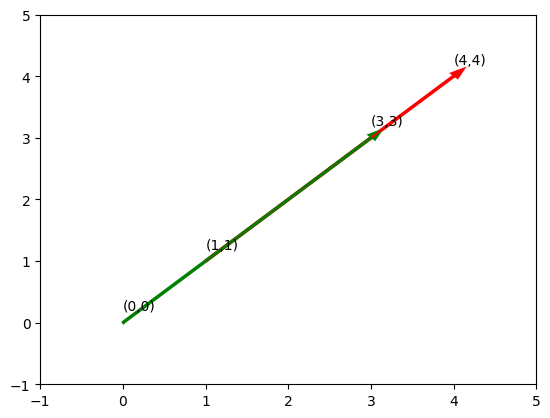

In [4]:
LS.anon(OT)

(double) 0.0000000


##### Test case 2: Two line segments with 45 degree angle in between

In [5]:
Point a2(1,1);
Point b2(3,1);
Line_Segment LS2(a2, b2);
Point m2(1,1);
Point n2(3,3);
Line_Segment OT2(m2, n2);

Here's the two line segments constructed from the above code, red line segment {(1,1),(3,1)} and green line segment {(1,1),(3,3)} forming a 45 degree angle in between, we then use the anon function and get the value of 4. 

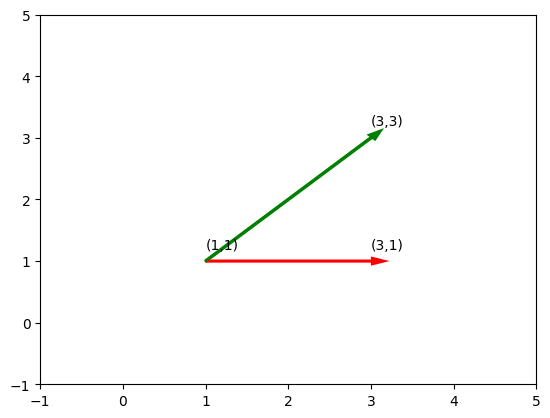

In [6]:
LS2.anon(OT2)

(double) 4.0000000


##### Test case 3: Two line segments with 90 degree angle in between

In [7]:
Point a3(1,3);
Point b3(5,3);
Line_Segment LS3(a3, b3);
Point m3(2,1);
Point n3(2,7);
Line_Segment OT3(m3, n3);

Here's the two line segments constructed from the above code, red line segment {(1,3),(5,3)} and green line segment {(2,1),(2,7)} forming a 90 degree angle in between, we then use the anon function and get the value of 24. 

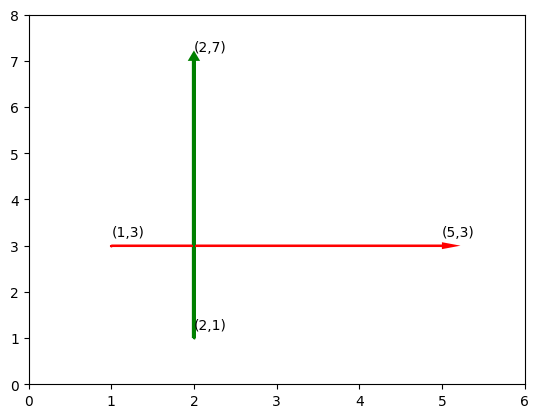

In [8]:
LS3.anon(OT3)

(double) 24.000000


##### Test case 4: Same two line segments as test case 2, but in different order.

The line segment graph should be the same shown in test case 2 with the green and red color switch, the anon function gives the value of -4, which is exactly the negative value of what we get in test case 2.

In [9]:
OT2.anon(LS2)

(double) -4.0000000


The anon function is trying to calculate the determinant from the cross product of the two line segments. Illustrated from the above examples, when two line segments are overlapping, the cross product of the two segments(vectors) should be 0; When two line segments have certain angle $\theta$ between, than the cross product should be the value of $|Seg1|\cdot|Seg2|\cdot sin\theta$. For example, in test case 3, $\theta = 90^{\circ}$, $sin\theta = 1$, therefore we have the final result of just $|Seg1|\cdot|Seg2| = 4 \cdot 6 = 24$. The sign of the $sin(\theta)$ depends on the order of two vectors, test case 2 and test case 4 use the same exact two line segments, but with different order, the value we gain from anon function is opposite (4 and -4). Therefore, it can also be understand as the determinant of the cross product in 3-dimensional space of two vectors (but with $a_{z}=b_{z}=0$). See the figure below as an example:

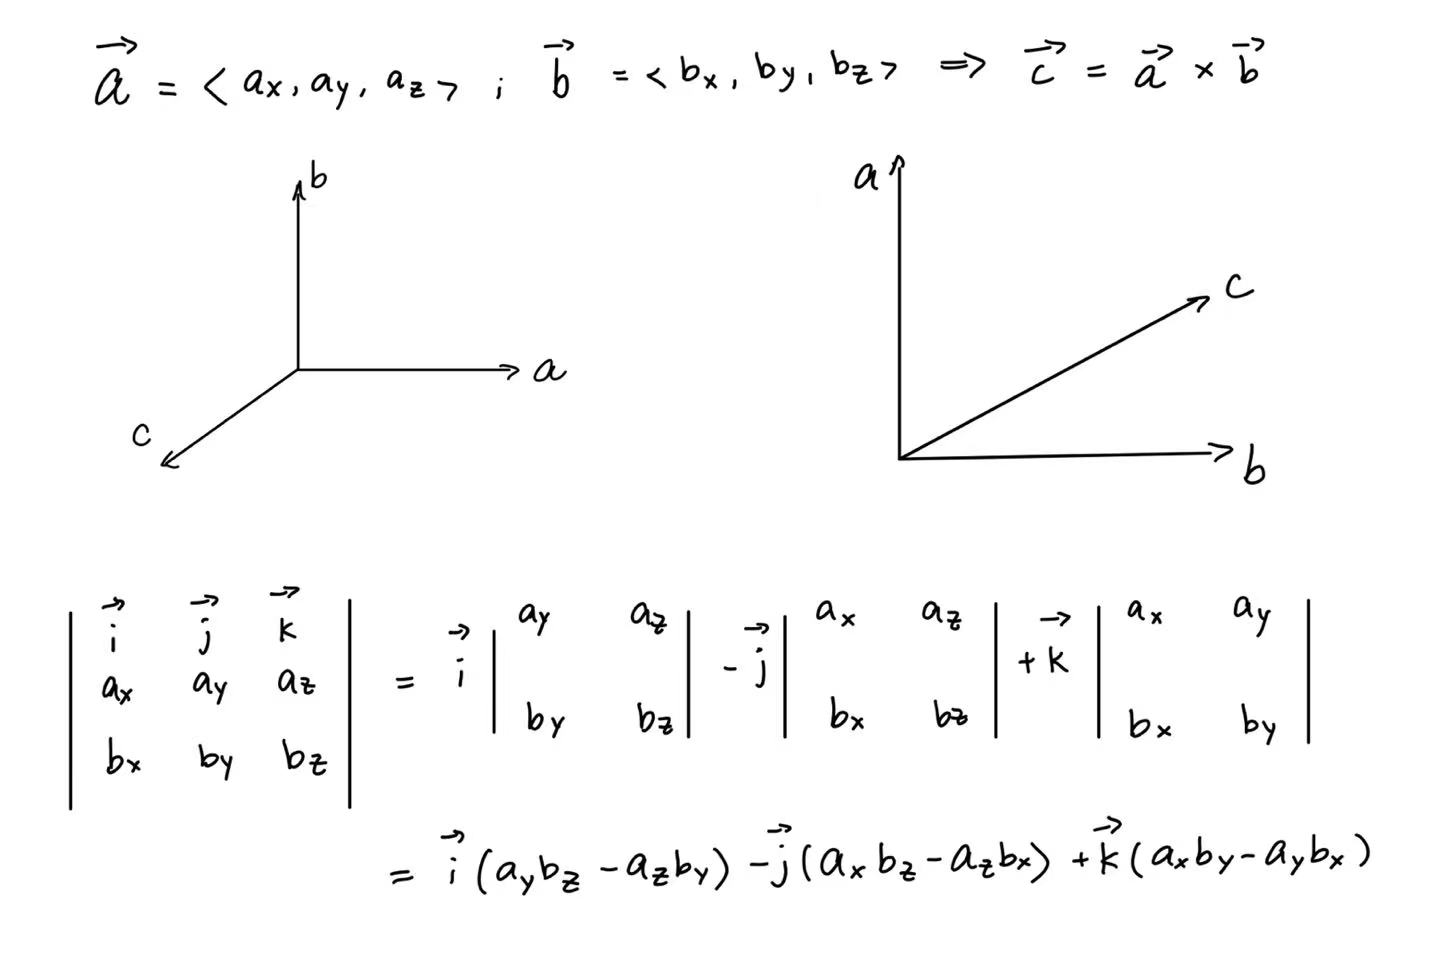

The above figure indicates how to calculate the cross product for two vectors in 3-dimensional spaces. Reflect to the algorithm, the coefficients (determinant) for unit vector i and j are 0, since the two vectors are in 2-dimensional plane. Therefore, the value calculated using anon function is the coefficient for unit vector k: $a_{x}b_{y}-a_{y}b_{x}$.

## Part 2

Given two line segments in the same plane, the following algorithm determines whether the two line segments intersects or not.

Given line segment1: Seg1 with two end points: Point A and Point B; Line segment2: Seg2 with two end points: Point C and Point D. 

$\textbf{Stage 1}$
In the first stage of the algorithm we check the following easy cases to rule out some possibility that the line segment AB and line segment CD are not intersecting. Thinking about the rectangulars formed by the AB and CD as their diagonals, if the two rectangulars don't have any overlapping area, then the two line segments are for sure not intersecting, this can be described as the following:
* $ max ( A.x, B.x ) < min ( C.x, D.x ) $
* $ min ( A.x, B.x ) > max ( C.x, D.x ) $
* $ max ( A.y, B.y ) < min ( C.y, D.y ) $
* $ min ( A.y, B.y ) > max ( C.y, D.y ) $

If any of the above four conditions hold for segment AB and segment CD, the result are: $\textit{'The input line segments do NOT intersect'}$. 

$\textbf{Stage 2}$
If none of the above four conditions hold, we enter the second stage (Two rectangulars have overlapping areas):
When segment AB and segment CD is intersecting, point A and point B are on the different sides of segment CD, similarly point C and point D are on the different sides of segment AB, based on the rules of cross product, when line AB and line CD are intersecting, cross product of AB and AC should have the opposite sign of cross product of AB and AD. Similarly, the cross product of DC and DA should have the opposite sign of cross product of DC and DB. To do this, we conduct the following algorithm:
1. Let $Z_1 = AB \times AC$ ; $Z_2 = AB \times AD$ ; $Z_3 = DC \times DA$ ; $Z_4 = DC \times DB$. (These values can be caluculated using the 'anon' function in part1's algorithm of this coursework)
2. Let $s_1 = Z_1 \cdot Z_2$ ; $s_2 = Z_3 \cdot Z_4$
3. If $ s_1 \leq 0 $ and $ s_2 \leq 0 $, return: $\textit{'The input line segments intersect!'}$ ; Otherwise, return: $\textit{'The input line segments do NOT intersect!'}$.



Here are two examples of cases where we can tell that the line segments do NOT intersect based on first stage criteria:

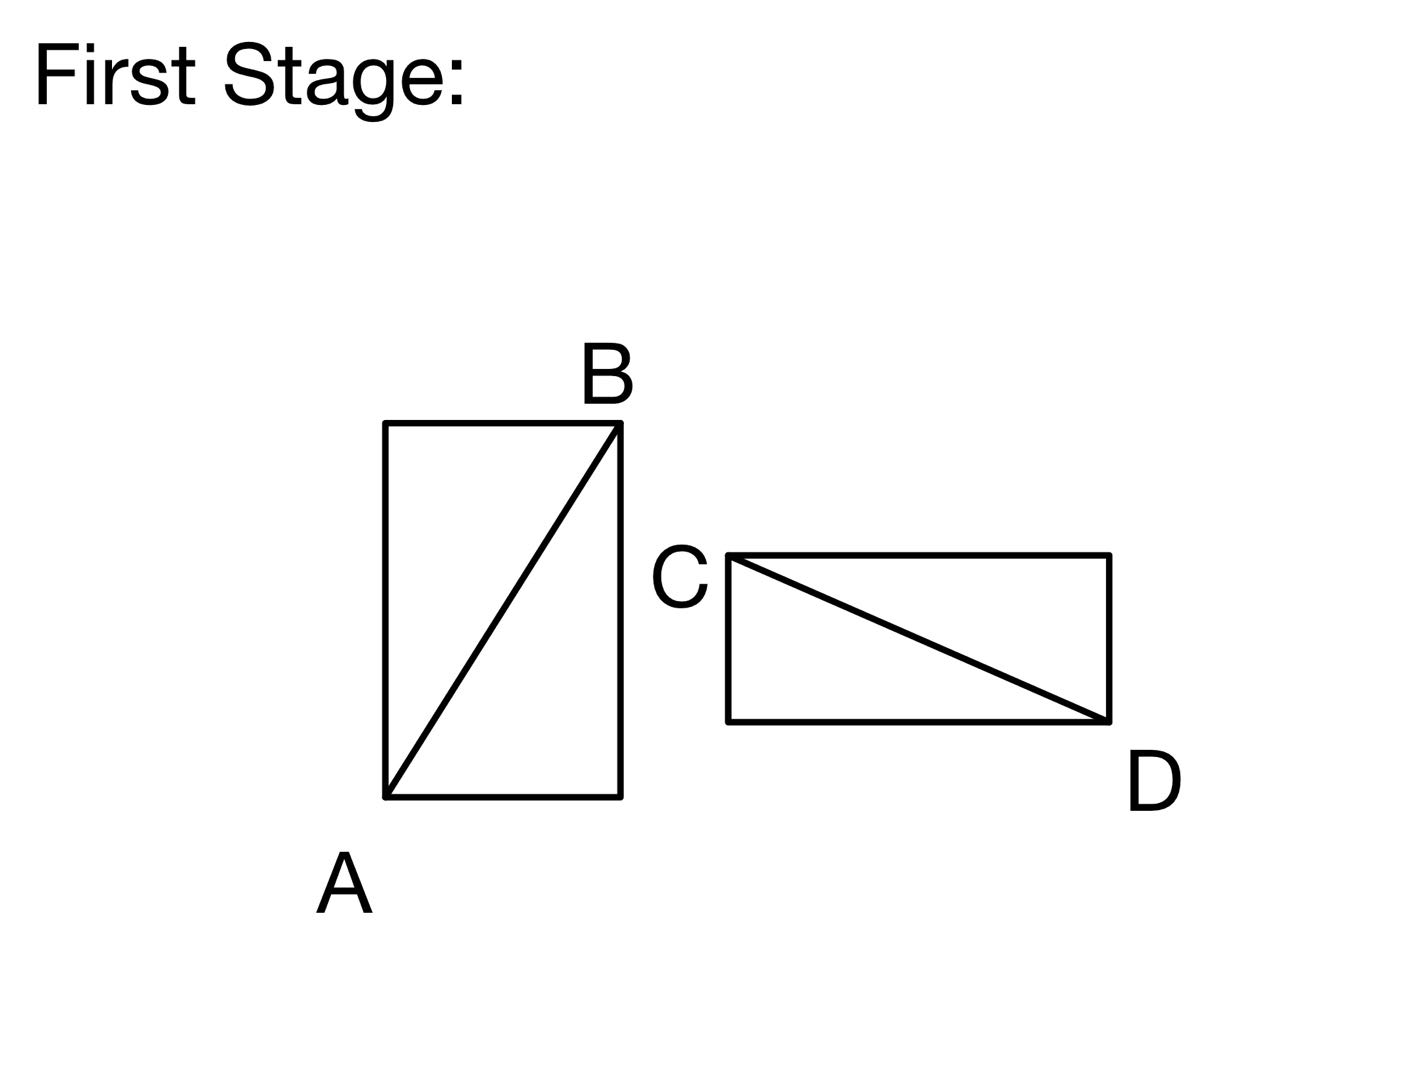

Since $ max ( A.x, B.x )=B.x < min ( C.x, D.x )=C.x $, two rectangulars do not overlap and therefore the two line segments do NOT intersect.

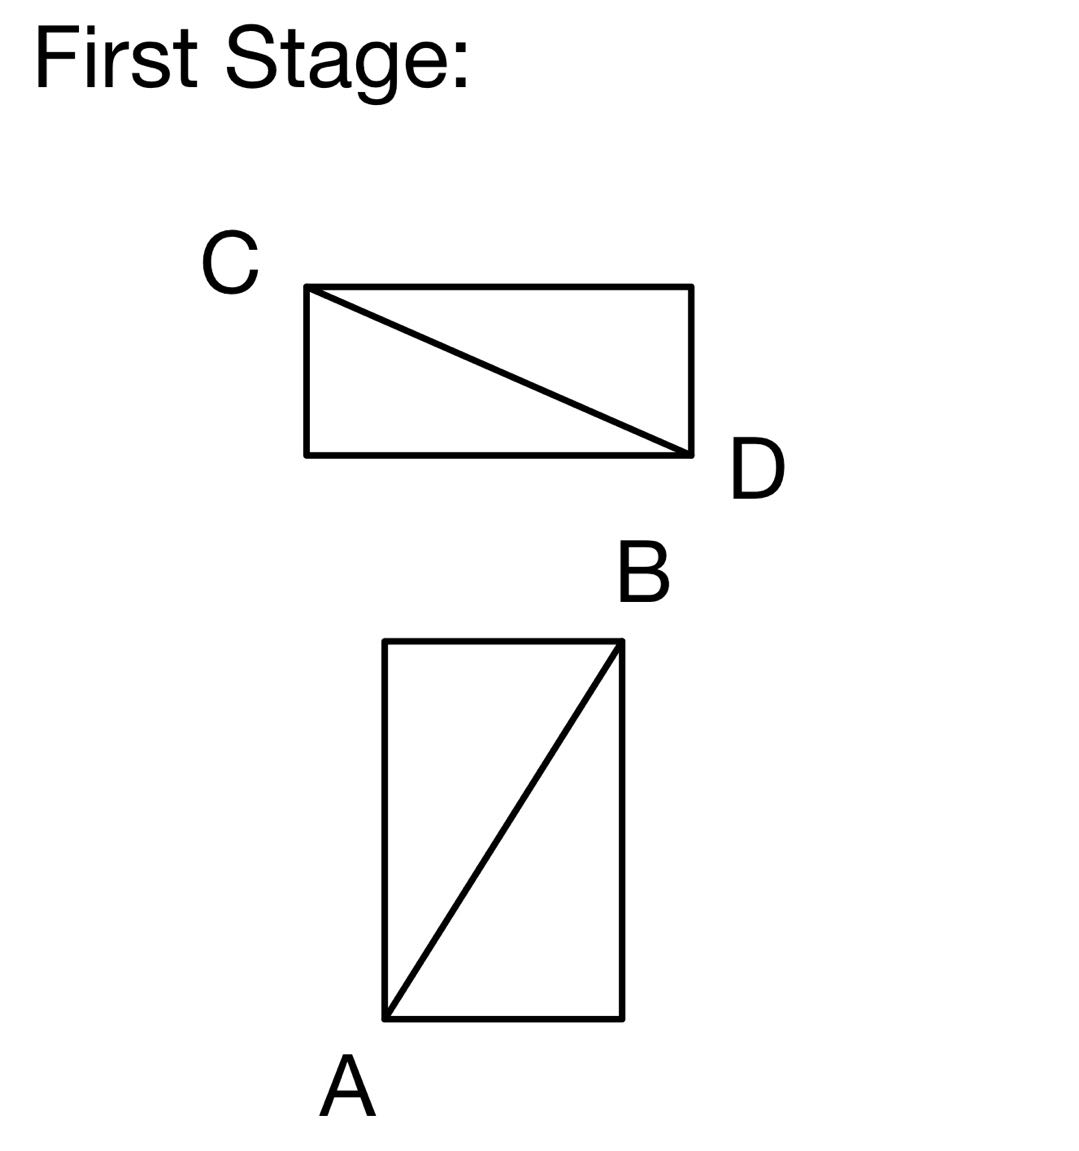

Since $ max ( A.y, B.y )=B.y < min ( C.y, D.y )=D.y $, two rectangulars do not overlap and therefore the two line segments do NOT intersect.

Obviously, only going through the criteria in stage 1 does not cover all the possibilities of where the two line segments lie in the same plane. For those don't satisfy neither of the four conditions in stage 1, the rectangulars have overlap area and this could lead to lines intersecting or not. The two figures below indicate these two possibilities:

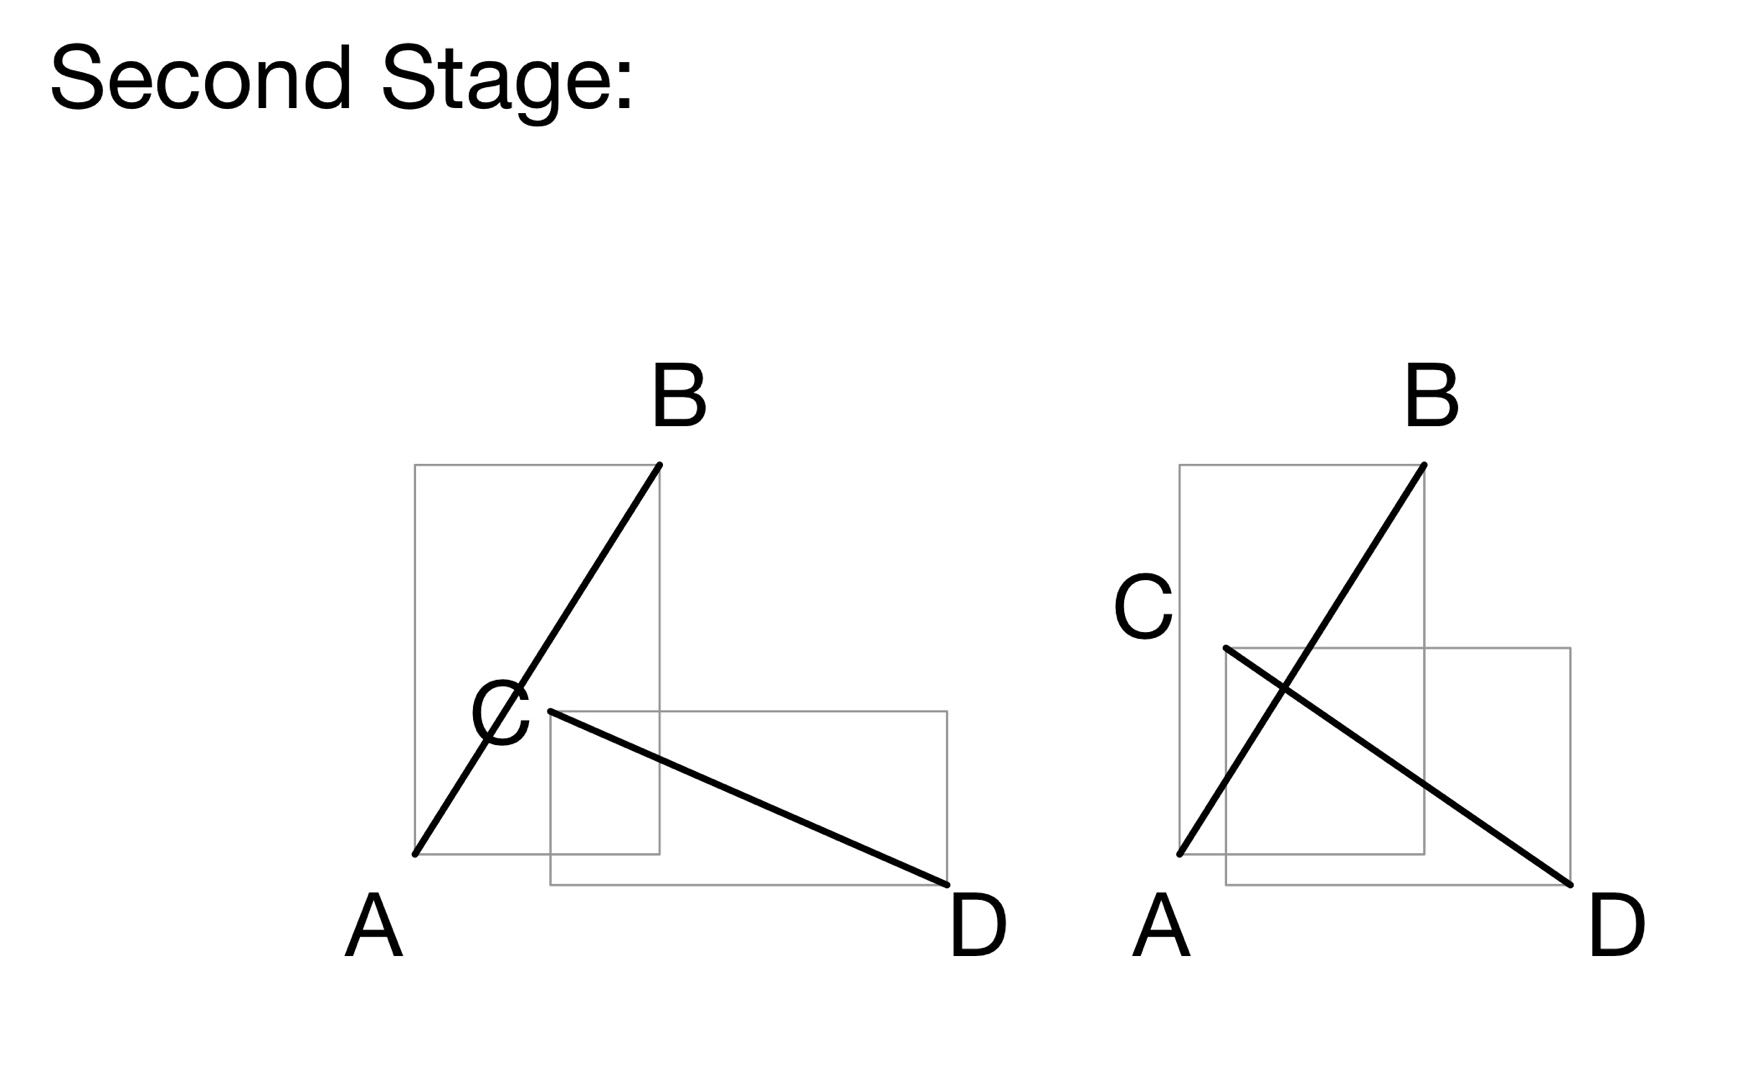

We could see that in order for two line segments to intersect, we need C and D to be in the different side of segment AB while also A and B to be in the differnt side of segment CD. This can be checked using the cross product:

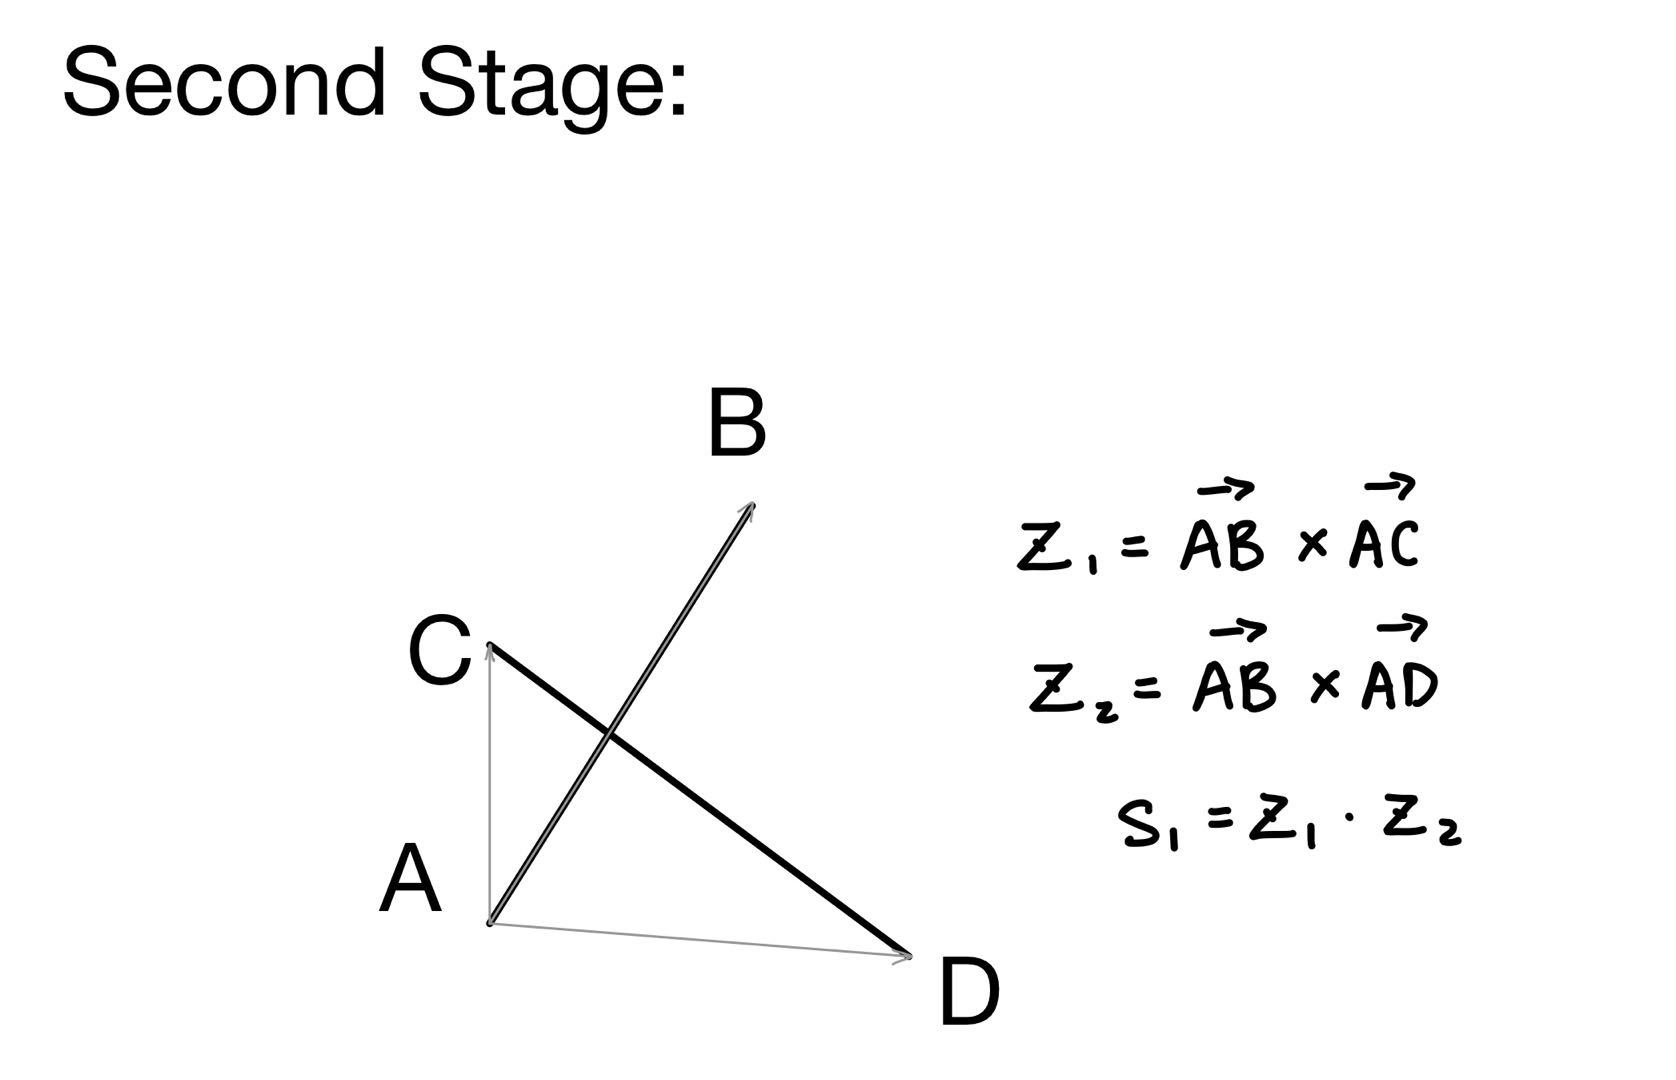

When $Z_{1}$ and $Z_{2}$ have opposite sign, or at least one of them is 0, $s_{1}$ will be non-positive. It simply means C and D are in different sides of line segment AB. If $s_{1}$ is positive, it indicates that C and D are in the same side of line segment AB, which also suggest that line AB and CD do NOT intersect.

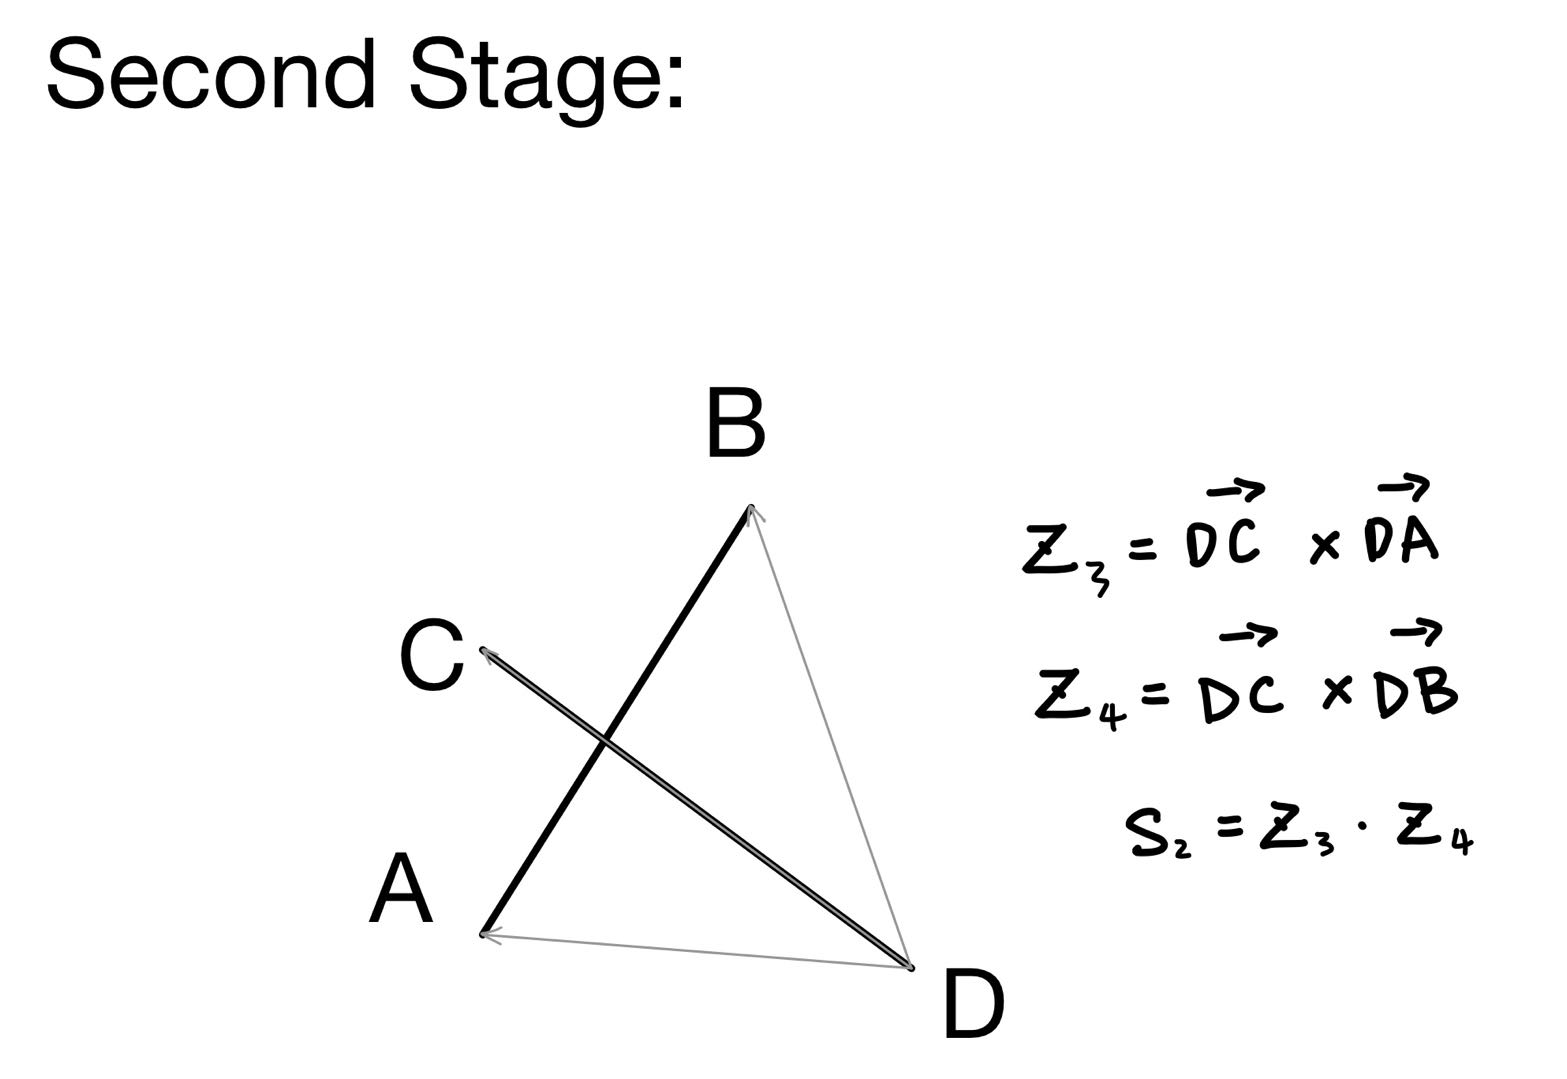

When $Z_{3}$ and $Z_{4}$ have opposite sign, or at least one of them is 0, $s_{2}$ will be non-positive. It simply means A and B are in different sides of line segment CD. If $s_{2}$ is positive, it indicates that A and B are in the same side of line segment CD, which also suggest that line AB and CD do NOT intersect.

Therefore, when both $s_{1}$ and $s_{2}$ are non-positive, we can conclude that the line segments AB and CD intersect!

## Part 3

All the code are tested with C++17

In [10]:
#include <iostream>

In [11]:
#include <list>

In [12]:
#include <vector>

In [13]:
#include <algorithm>

In [14]:
#include <cmath>

In [15]:
struct Point
{
    double x;
    double y;
}

input_line_18:1:8: error: redefinition of 'Point'
struct Point
       ^
input_line_4:1:8: note: previous definition is here
struct Point
       ^


ename: evalue

In [16]:
float dist(Point a, Point b)
{
    return sqrt((a.x-b.x)*(a.x-b.x)+(a.y-b.y)*(a.y-b.y)); 
    // A function to return the Euclidean distance between the given two points
}

In [17]:
float ccw(Point p, Point q, Point r)
{
    float val = (q.y-p.y) * (r.x-q.x) - (q.x-p.x) * (r.y-q.y);
    return val;
    // A function to calculate the cross product of pq and pr
}

In [18]:
bool sortpt (Point a, Point b){
return a.y < b.y;
// A boolean function to help sorting the points, this will be used when removing duplicates
}

In [19]:
bool equalpt (Point a, Point b){
return ((a.y == b.y) && (a.x == b.x));
// A boolean function to check if two points are the same
}

In [20]:
std::vector<Point> Jarvis_March(std::vector<Point> points)
{
    // First we remove the duplicates from the input:
    std::sort(points.begin(),points.end(),sortpt);
    std::vector<Point>::iterator new_end;
    new_end = std::unique(points.begin(),points.end(),equalpt);
    points.erase(new_end,points.end());
    
    // Create a vector of points hull to record the final output 
    std::vector<Point> hull;
    int n = points.size();
    
    // If the number of the points in the input vector after removing duplicate is less than 3, we output an empty vector 
    // This depends on how we define the convex hull, if the minimum number of points to form a convex hull could be defined
    // less than 3, than the return in the following if condition can be changed to return the 'points' in stead of 'hull'
    if (n <= 2)
    {
    std::cout << "The number of the points are not enough to form a convex hull!" << std::endl;
    return hull;
    }
    
    // We then find the leftmost point with the highest y-coordinate.
    int l = 0;
    for (int i =1; i<n; i++){
        if (points[i].x < points[l].x){
        l=i;
        } else if (points[i].x == points[l].x){
            if (points[i].y > points[l].y){
            l=i;
            }
        }
    }
    int p =l;
    int q;
    float disa;
    float disb;
    float dd;
    
    
    while(true){
    hull.push_back(points[p]);
    
    // Initialize q as the next index (index+1) or 0 if p is the last point's index
    if (p == n-1){
            q = 0;
            } else {
            q = p + 1;
            }
    for (int r = 0; r<n; r++){
    disa = dist(points[r],points[p]);
    disb = dist(points[q],points[p]);
    dd = ccw(points[p], points[r], points[q]);
    if (dd < 0 or (dd == 0 and disa > disb)){
    q = r;
    // for all the points r in the points set, if r is counterclockwise, 
    // we update q as r, if there's collinearity, 
    // we consider the farthest point
    }
    }
    p = q;
    // Update our next p to be the current q
    if (p == l){ 
    // When the first p is detected again, we stop the algorithm
    hull.push_back(points[l]);
    // The first point is added to the hull list again for the convenience of checking the convex hull is closed.
    break;
    }
    }
    return hull;
}

In [21]:
#include <fstream>
#include <sstream>
#include <string>

template <typename T>
T lexical_cast(const std::string& str)
{
    T var;
    std::istringstream iss;
    iss.str(str);
    iss >> var;
    // deal with any error bits that may have been set on the stream
    return var;
}

template<typename data_type,
template <typename... table_type_args> typename table_type,
template <typename... row_type_args> typename row_type>
table_type<row_type<data_type> > csvtable(const std::string& filename)
{
  table_type<row_type<data_type> > table;
  std::ifstream infile(filename);
  while(infile)
    {
      std::string s;
      if(!getline(infile,s)) break;
      std::istringstream ss(s);
      row_type<data_type> row;
      while(ss)
      {
         std::string s;
         if(!getline(ss,s,',')) break;
         row.push_back(lexical_cast<data_type>(s)); 
      }
      table.push_back(row);
    }
  return table;
}

#include <list>
#include <vector>

#define readcsv csvtable<double,std::list,std::vector>

##### Test on square data

In [22]:
std::string filename {"square.csv"};
std::list<std::vector<double> > xy_pairs {readcsv(filename)};
std::vector<Point> pinput;
float xindex;
float yindex;
  for(std::vector<double>& xy_pair : xy_pairs)
    {
    xindex = xy_pair[0];
    yindex = xy_pair[1];
    pinput.push_back(Point {xindex, yindex});
    }

In [23]:
pinput

(std::vector<Point> &) { @0x7f3ef23db9d0, @0x7f3ef23db9e0, @0x7f3ef23db9f0, @0x7f3ef23dba00, @0x7f3ef23dba10, @0x7f3ef23dba20 }


In [24]:
std::vector<Point> res1 = Jarvis_March(pinput)

In [25]:
    for (int k=0; k < res1.size(); k++){
    std::cout << "(" << res1[k].x << ", "<< res1[k].y << ") \n";
    }

(1, 2) 
(1, 1) 
(2, 1) 
(2, 2) 
(1.5, 2.5) 
(1, 2) 


Therefore the convex hull is {(1, 2), (1, 1), (2, 1), (2, 2), (1.5, 2.5)}

##### Test on line data

In [26]:
std::string filename2 {"line.csv"};
std::list<std::vector<double> > xy2_pairs {readcsv(filename2)};
std::vector<Point> pinput2;
float xindex2;
float yindex2;
  for(std::vector<double>& xy2_pair : xy2_pairs)
    {
    xindex2 = xy2_pair[0];
    yindex2 = xy2_pair[1];
    pinput2.push_back(Point {xindex2, yindex2});
    }

In [27]:
pinput2

(std::vector<Point> &) { @0x7f3ef2394cf0, @0x7f3ef2394d00, @0x7f3ef2394d10 }


In [28]:
std::vector<Point> res2 = Jarvis_March(pinput2)

In [29]:
    for (int k=0; k < res2.size(); k++){
    std::cout << "(" << res2[k].x << ", "<< res2[k].y << ") \n";
    }

(1, 1) 
(3, 3) 
(1, 1) 


Therefore the convex hull is {(1, 1), (3, 3)}

##### Test on random data

In [30]:
std::string filename3 {"random.csv"};
std::list<std::vector<double> > xy3_pairs {readcsv(filename3)};
std::vector<Point> pinput3;
float xindex3;
float yindex3;
  for(std::vector<double>& xy3_pair : xy3_pairs)
    {
    xindex3 = xy3_pair[0];
    yindex3 = xy3_pair[1];
    pinput3.push_back(Point {xindex3, yindex3});
    }

In [31]:
std::vector<Point> res3 = Jarvis_March(pinput3)

In [32]:
    for (int k=0; k < res3.size(); k++){
    std::cout << "(" << res3[k].x << ", "<< res3[k].y << ") \n";
    }

(-0.716574, 1.2022) 
(-0.6052, 0.957134) 
(-0.432249, 0.600185) 
(0.156197, 0.537196) 
(0.353922, 0.654945) 
(0.505824, 1.12001) 
(0.358984, 1.56677) 
(-0.380952, 1.45311) 
(-0.545292, 1.40504) 
(-0.716574, 1.2022) 


Therefore the convex hull is {(-0.716574, 1.2022), (-0.6052, 0.957134), (-0.432249, 0.600185), (0.156197, 0.537196), (0.353922, 0.654945), (0.505824, 1.12001), (0.358984, 1.56677), (-0.380952, 1.45311), (-0.545292, 1.40504)}

##### Test on pgram data

In [33]:
std::string filename4 {"pgram.csv"};
std::list<std::vector<double> > xy4_pairs {readcsv(filename4)};
std::vector<Point> pinput4;
float xindex4;
float yindex4;
  for(std::vector<double>& xy4_pair : xy4_pairs)
    {
    xindex4 = xy4_pair[0];
    yindex4 = xy4_pair[1];
    pinput4.push_back(Point {xindex4, yindex4});
    }

In [34]:
std::vector<Point> res4 = Jarvis_March(pinput4)

In [35]:
    for (int k=0; k < res4.size(); k++){
    std::cout << "(" << res4[k].x << ", "<< res4[k].y << ") \n";
    }

(1, 1) 
(2, 1) 
(3, 2) 
(2.5, 2.5) 
(1, 1) 


Therefore the convex hull is {(1, 1), (2, 1), (3, 2), (2.5, 2.5)}

We could see that all the results are the same as the one given by the Jarvis March in python for the given four data sets.

##### Test on input with less than three points

In [36]:
std::vector<Point> pinput5;
pinput5.push_back(Point {1, 1});
pinput5.push_back(Point {2, 2});
std::vector<Point> res5 = Jarvis_March(pinput5)


The number of the points are not enough to form a convex hull!


##### Test on input with duplicate points

In [37]:
std::vector<Point> pinput6;
pinput6.push_back(Point {1, 1});
pinput6.push_back(Point {2, 2});
pinput6.push_back(Point {3, 3});
pinput6.push_back(Point {1, 1});
std::vector<Point> res6 = Jarvis_March(pinput6)

In [38]:
    for (int k=0; k < res6.size(); k++){
    std::cout << "(" << res6[k].x << ", "<< res6[k].y << ") \n";
    }

(1, 1) 
(3, 3) 
(1, 1) 


#### Comparison to Python code

1. Re-runable: The python code of JM algorithm relies on some of the packages. For instance, the drop_deplicate function in pandas, as the system and libraries envolving, we won't be sure if the code would be re-runable in the future. Similar situations are faced for the C++ code for JM algorithm, cmath and vector libraries are used. However, since the execution environment (C++17) including what types of library were used are mention in front of the code giving enough information to recreate the code in different system, the code are re-runable.
2. Repeatable: Repeatable means the code is running and producing the expected results over successive runs of the algorithm. Both the code in Python and C++ have repeatable results conducting JM algorithm: given the same input of points, the output convex hull are the same no matter how many times we run the code. However, one thing to notice is that, since redefinition is not allowed in C++, when conducting the same JM algorithm repeatedly, one might need to rename the variable which we used to store the output each time we repeat.
3. Reproducible: reproducible requires that other researchers can obtain the exact same results using the original data and code. This usually involves the different systems that researchers work on. When computing the computational cost for running the JM algoritm in Python from the last coursework, we specify the exact seed that we are using for generating the input data. If similar jobs need to be conducted through C++, we also need to set the random seed for reproducibility. This can be done by srand() function.
4. Reusable: For both the python code and C++ code, I've added comments and instructions along the code, so that the code can be easily modified, used and understand by me or other researchers. Due to more complex way of writing code in C++, when modifying the code, one might need extra attention in terms of for examle the initialization of variables or identify the type of the variables. 
5. Replicable: Replicable means that the description of the algorithm must be sufficiently precise and complete to enable any results to be reproducible. The JM algorithm code written above uses the same concepture idea as the code in python, and by testing on the same four dataset, we obtain the exact same results.

## Part 4

Given a set $Q$ of points in the plane, we have the number of points: $|Q|=N$, the following algorithm aims to output the two points that are the furthest apart:

Initiate the max distance to be any non-positive value.

    For i in [1:N]:

        For j in [i:N]:

               If distance between Point[i] and Points[j] is larger than the current max     distance:

                * Update the max distance to be the distance between Point[i] and Point[j]

                * Update max_i and max_j
            
Return the max distance and the index of the points correspond to that distance ( i and j )

In this algorithm, since we are comparing all the possible pairs' distance, the computational complexity for the algorithm will always be $\mathcal{O}(N^2)$ (for both best and worst cases).

## Part 5

In [39]:
#include <iostream>

In [40]:
#include <cmath>

In [41]:
#include <cfloat>

In [42]:
struct Point
{
    double x;
    double y;
}

input_line_45:1:8: error: redefinition of 'Point'
struct Point
       ^
input_line_4:1:8: note: previous definition is here
struct Point
       ^


ename: evalue

In [44]:
float dist(Point a, Point b)
{
    return sqrt((a.x-b.x)*(a.x-b.x)+(a.y-b.y)*(a.y-b.y));
}

input_line_47:1:7: error: redefinition of 'dist'
float dist(Point a, Point b)
      ^
input_line_19:1:7: note: previous definition is here
float dist(Point a, Point b)
      ^


ename: evalue

In [45]:
float MaxDist(Point P[], size_t n, Point &PP1, Point &PP2){
    float maxdis = -1;
    for (int i = 0; i <n; ++i)
        for (int j = i+1; j <n; ++j)
            if (dist(P[i],P[j]) > maxdis){
                maxdis = dist(P[i],P[j]);
                PP1.x = P[i].x, PP1.y = P[i].y;
                PP2.x = P[j].x, PP2.y = P[j].y;
                }
    return maxdis;
}

input_line_48:1:7: error: redefinition of 'MaxDist'
float MaxDist(Point P[], size_t n, Point &PP1, Point &PP2){
      ^
input_line_46:1:7: note: previous definition is here
float MaxDist(Point P[], size_t n, Point &PP1, Point &PP2){
      ^


ename: evalue

##### Test case1: 3 points

In [46]:
Point P[] = {{2,3},{4,5},{5,6}};
Point Pt1 ={DBL_MAX,DBL_MAX};
Point Pt2 ={DBL_MAX,DBL_MAX};

In [47]:
MaxDist(P,std::size(P),Pt1,Pt2);
std::cout << "The Furthest distance is: " << MaxDist(P,std::size(P),Pt1,Pt2) << std::endl;

The Furthest distance is: 4.24264


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f3f27dfd540


In [48]:
std::cout << "(" << Pt1.x << ", " << Pt1.y << ") and (" << Pt2.x 
<< ", " << Pt2.y << ")" <<std::endl;

(2, 3) and (5, 6)


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f3f27dfd540


##### Test case2: More than 3 points

In [49]:
Point PP[] = {{2,3},{4,5},{5,6},{100,100}};
Point Pt3 ={DBL_MAX,DBL_MAX};
Point Pt4 ={DBL_MAX,DBL_MAX};

In [50]:
MaxDist(PP,std::size(PP),Pt3,Pt4);
std::cout << "The Furthest distance is: " << MaxDist(PP,std::size(PP),Pt3,Pt4) << std::endl;

The Furthest distance is: 137.888


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f3f27dfd540


In [51]:
std::cout << "(" << Pt3.x << ", " << Pt3.y << ") and (" << Pt4.x 
<< ", " << Pt4.y << ")" <<std::endl;

(2, 3) and (100, 100)


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f3f27dfd540


##### Test case3: Two exact same points

In [52]:
Point PPP[] = {{2,3},{2,3}};
Point Pt5 ={DBL_MAX,DBL_MAX};
Point Pt6 ={DBL_MAX,DBL_MAX};

In [53]:
MaxDist(PPP,std::size(PPP),Pt5,Pt6);
std::cout << "The Furthest distance is: " << MaxDist(PPP,std::size(PPP),Pt5,Pt6) << std::endl;

The Furthest distance is: 0


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f3f27dfd540


In [54]:
std::cout << "(" << Pt5.x << ", " << Pt5.y << ") and (" << Pt6.x 
<< ", " << Pt6.y << ")" <<std::endl;

(2, 3) and (2, 3)


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f3f27dfd540


The above are the implementation of 'brute force' algorithm described in Part 4. The computational complexity of both the best case and worst case are of $\mathcal{O}(N^{2})$, since it goes through all the possible pairs in the given point set. One more efficient algorithm in terms of searching for the furthest points among a set of points could be using the idea of convex hull. It is obvious to see that the furthest apart two points should be on the convex hull of the input points set. Therefore, instead of calculating the distance for all possible pairs in the set, we can simplify the algorithm to only compare the distance for all possible pairs in the convex hull set after finding the convex hull of the point set. The following are the pseudocode for the improved algorithm searching for the furthest apart points in a given set:

#### Given a set $Q$ of points in the plane, the following algorithm aims to output the two points that are the furthest apart:

#### STAGE 1:
1. Using the Jarvis March algorithm with input points set $Q$ to find its corresponding convex hull set $V$, we have the number of points in the convex hull set: $|V|= M $

#### STAGE 2:
2. Initiate the max distance to be any non-positive value.

        For i in [1:M]:

            For j in [i:M]:

                If distance between Point[i] and Points[j] is larger than the current max distance:

                    * Update the max distance to be the distance between Point[i] and Point[j]

                    * Update max_i and max_j

    Return the max distance and the index of the points correspond to that distance ( i and j )

The computational complexity of the above improved algorithm has better best case comparing to the 'brute force' algorithm, the computational complexity for the first stage of the algorithm is $\mathcal{O}(NM)$, where N is the number of points in the given dataset and M is the number of points in the convex hull set; The computational complexity for the second stage of the algorithm is $\mathcal{O}(M^2)$. Therefore, in the best case scenario, the computational complexity of the whole algorithm is $\mathcal{O}(NM+M^2)$ which is more efficiently than the 'brute force' algorithm since in the best case scenario, we have M strictly less than N (i.e. not all the points in the given algorithm is in the convex hull set). In the case where $M << N$, $\mathcal{O}(NM+M^2)$ is strictly better than $\mathcal{O}(N^2)$.